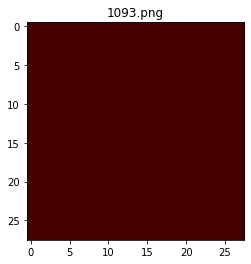

In [2]:
'''
ECE276A WI22 PR1: Color Classification and Recycling Bin Detection
'''


import numpy as np
import matplotlib.pyplot as plt; plt.ion()
import os, cv2

def read_pixels(folder, verbose = False):
  '''
    Reads 3-D pixel value of the top left corner of each image in folder
    and returns an n x 3 matrix X containing the pixel values 
  '''  
  n = len(next(os.walk(folder))[2]) # number of files
  X = np.empty([n, 3])
  i = 0
  
  if verbose:
    fig, ax = plt.subplots()
    h = ax.imshow(np.random.randint(255, size=(28,28,3)).astype('uint8'))
  
  for filename in os.listdir(folder):  
    # read image
    # img = plt.imread(os.path.join(folder,filename), 0)
    img = cv2.imread(os.path.join(folder,filename))
    # convert from BGR (opencv convention) to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # store pixel rgb value
    X[i] = img[0,0].astype(np.float64)/255
    i += 1
    
    # display
    if verbose:
      h.set_data(img)
      ax.set_title(filename)
      fig.canvas.flush_events()
      plt.show()

  return X


if __name__ == '__main__':
  folder = 'data/training'
  X1 = read_pixels(folder+'/red', verbose = True)
  X2 = read_pixels(folder+'/green')
  X3 = read_pixels(folder+'/blue')
  #y1,y2,y3-number of red,green,blue samples
  y1, y2, y3 = np.full(X1.shape[0],1), np.full(X2.shape[0], 2), np.full(X3.shape[0],3)
  X, y = np.concatenate((X1,X2,X3)), np.concatenate((y1,y2,y3))

In [6]:
   #Check the shape of X,y for training
   print(X.shape,y3.shape)#X.shape:(3694,3),y.shape(3694,)

(3694, 3) (1143,)


In [25]:
   #Train pixel classifier using Naive Bayes
   
   #Calculate Gaussian Naive Bayes parameters for each class
   #Calculate mean for each class
   mean_rgb = np.zeros((3,3))
   mean_rgb[0,:] =  np.mean(X1,axis = 0)
   mean_rgb[1,:] =  np.mean(X2,axis = 0)
   mean_rgb[2,:] =  np.mean(X3,axis = 0)
    
   #Calculate variance for each class
   var_rgb = np.zeros((3,3))
   var_rgb[0,:] = np.var(X1,axis = 0)
   var_rgb[1,:] = np.var(X2,axis = 0)
   var_rgb[2,:] = np.var(X3,axis = 0)
    
   #Calculate prior probability theta for each class, theta = 
   theta = np.zeros((3,1))
   theta[0] = len(y1)/X.shape[0]
   theta[1] = len(y2)/X.shape[0]
   theta[2] = len(y3)/X.shape[0]
    
   #Calculate mu for each class, mu = mean for each class
   mu = np.zeros((3,3))
   mu = mean_rgb

   #Calculate sigma for each class, sigma = n/n-1 * var
   sigma = np.zeros((3,3))
   sigma[0,:] = var_rgb[0,:]*len(y1)/(len(y1)-1)
   sigma[1,:] = var_rgb[1,:]*len(y2)/(len(y2)-1)
   sigma[2,:] = var_rgb[2,:]*len(y3)/(len(y3)-1)

In [23]:
   print("theta",theta)
   print("mu",mu)
   print("sigma",var_rgb)

theta [[0.36599892]
 [0.3245804 ]
 [0.30942068]]
mu [[0.75250609 0.34808562 0.34891229]
 [0.35060917 0.73551489 0.32949353]
 [0.34735903 0.33111351 0.73526495]]
sigma [[0.03705927 0.06196869 0.06202255]
 [0.05573463 0.03478593 0.05602188]
 [0.05453762 0.05683331 0.03574061]]
